HOW MUCH RED PAINT DOES IT TAKE TO BE FUNNIER THAN SOUND?

In [1]:
from main import *

# SET FILENAME
filename = "ALZHEIMERS_HPLC.xlsx"  #in current working directory 

#optional 
# HT_filename = "TCB2_data_HT.csv"


In [20]:
#SUBSELECT RAW DATA
# subselectDf(getCompoundAndRatiosDf(filename), {"treatment": "3mg/kgTCB", "compound": "3MT", "region":["SJ", "dH"]}) #EXAMPLE USE

subselectDf(getCompoundAndRatiosDf(filename), {  "compound":["HVA"]})

# CHECK WHICH REGIONS EXIST FOR COMPOUND
# subselectDf(getCompoundAndRatiosDf(filename), {  "compound":["5HIAA"]})['region'].unique()


,mouse_id,group_id,value,compound,region,treatment,color,experiment,grubbs_outlier,eliminated_grubbs_outlier
3888,1.0,1,3.006941,HVA,MO,young_WT,white,Alzheimers,NaN,NaN
3889,5.0,1,5.639285,HVA,MO,young_WT,white,Alzheimers,NaN,NaN
3890,9.0,1,8.356093,HVA,MO,young_WT,white,Alzheimers,NaN,NaN
3891,13.0,1,14.492132,HVA,MO,young_WT,white,Alzheimers,NaN,NaN
3892,17.0,1,3.557714,HVA,MO,young_WT,white,Alzheimers,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5178,27.0,4,50.724638,HVA,MR,old_AD,firebrick,Alzheimers,NaN,NaN
5179,31.0,4,61.002179,HVA,MR,old_AD,firebrick,Alzheimers,NaN,NaN
5180,35.0,4,202.614379,HVA,MR,old_AD,firebrick,Alzheimers,NaN,NaN
5181,39.0,4,116.421569,HVA,MR,old_AD,firebrick,Alzheimers,NaN,NaN


In [17]:
# STATS GETTERS / SETTERS

#ALZ REGIONS
# 'MO', 'LO', 'M2', 'PL', 'IL', 'aCg', 'pCg', 'S1', 'ENT', 'A', 'DH','VH', 'SH', 'CO', 'VM', 'DM', 'VL', 'DL', 'GP', 'vlT', 'MD', 'HYP', 'CB', 'SN', 'VTA', 'DR', 'MR'

# TCB REGIONS
# "OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V", "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"

#RUN STATS
# if breaks check regions exist using above cell
justStats(filename, 
          experiments=['Alzheimers'], 
          compounds=['HVA'], 
          regions=['MO', 'LO', 'M2', 'PL', 'IL', 'aCg', 'S1', 'ENT', 'A', 'DH', 'VH',
                   'SH', 'CO', 'VM', 'DM', 'VL', 'DL', 'GP', 'vlT', 'MD', 'HYP', 'CB',
                    'SN', 'VTA', 'DR', 'MR'], 
        p_value_threshold=0.05)

# QUANTATIVE STATS
subselectDf(getQuantitativeStats(filename), {'experiment':'Alzheimers', 
                                             'is_significant':True, 
                                             'compound':'HVA', 
                                        #      'test':'one_way_anova',
                                             'region':[ "MO","LO","M2","IL","aCg","pCg","S1","ENT","A","DH", "VH","SH", "CO", "GP","vlT","HYP","CB" ]})

# AGGERGATED STATS DF
# getAggregateStatsDf(filename)


Calculating stats for Alzheimers, HVA, MO
Index(['mouse_id', 'group_id', 'value', 'compound', 'region', 'treatment',
       'color', 'experiment', 'grubbs_outlier', 'eliminated_grubbs_outlier'],
      dtype='object')

TWO_WAY_ANOVA NOT SIGNIFICANT
     Source        SS    DF       MS      F  p-unc    np2
0       old   157.070   1.0  157.070  4.584  0.038  0.103
1        AD    11.870   1.0   11.870  0.346  0.559  0.009
2  old * AD    16.487   1.0   16.487  0.481  0.492  0.012
3  Residual  1370.719  40.0   34.268    NaN    NaN    NaN

ONE_WAY_ANOVA NOT SIGNIFICANT
          F   p_value
0  1.845402  0.154474

TUKEY NOT SIGNIFICANT
     group1    group2  meandiff   p-adj    lower   upper  reject
0    old_AD    old_WT    2.2728  0.8013  -4.4456  8.9912   False
1    old_AD  young_AD   -2.4999  0.7630  -9.3557  4.3559   False
2    old_AD  young_WT   -2.6807  0.7225  -9.5365  4.1752   False
3    old_WT  young_AD   -4.7727  0.2228 -11.3225  1.7770   False
4    old_WT  young_WT   -4.9535  0.1952

,data_type,experiment,region,compound,test,p_value_threshold,is_significant,p_value,result
0,HPLC,Alzheimers,LO,HVA,one_way_anova,0.05,True,0.00751,F p_value 0 4.568478 0.00751
0,HPLC,Alzheimers,LO,HVA,tukey,0.05,True,"[[(old_AD, old_WT), (old_WT, young_AD)], [0.04...",group1 group2 meandiff p-adj low...
0,HPLC,Alzheimers,aCg,HVA,two_way_anova,0.05,True,0.02,Source SS DF MS F ...
0,HPLC,Alzheimers,A,HVA,one_way_anova,0.05,True,0.008409,F p_value 0 4.447256 0.008409
0,HPLC,Alzheimers,A,HVA,tukey,0.05,True,"[[(old_WT, young_WT)], [0.0089]]",group1 group2 meandiff p-adj low...
0,HPLC,Alzheimers,VH,HVA,two_way_anova,0.05,True,0.024,Source SS DF MS F p-u...
0,HPLC,Alzheimers,VH,HVA,one_way_anova,0.05,True,0.048771,F p_value 0 2.934708 0.048771
0,HPLC,Alzheimers,CO,HVA,two_way_anova,0.05,True,0.001,Source SS DF MS ...
0,HPLC,Alzheimers,CO,HVA,one_way_anova,0.05,True,0.000232,F p_value 0 8.077301 0.000232
0,HPLC,Alzheimers,CO,HVA,tukey,0.05,True,"[[(old_AD, old_WT), (old_WT, young_AD), (old_W...",group1 group2 meandiff p-adj lo...


PROCESSING HVA IN IL FOR Alzheimers


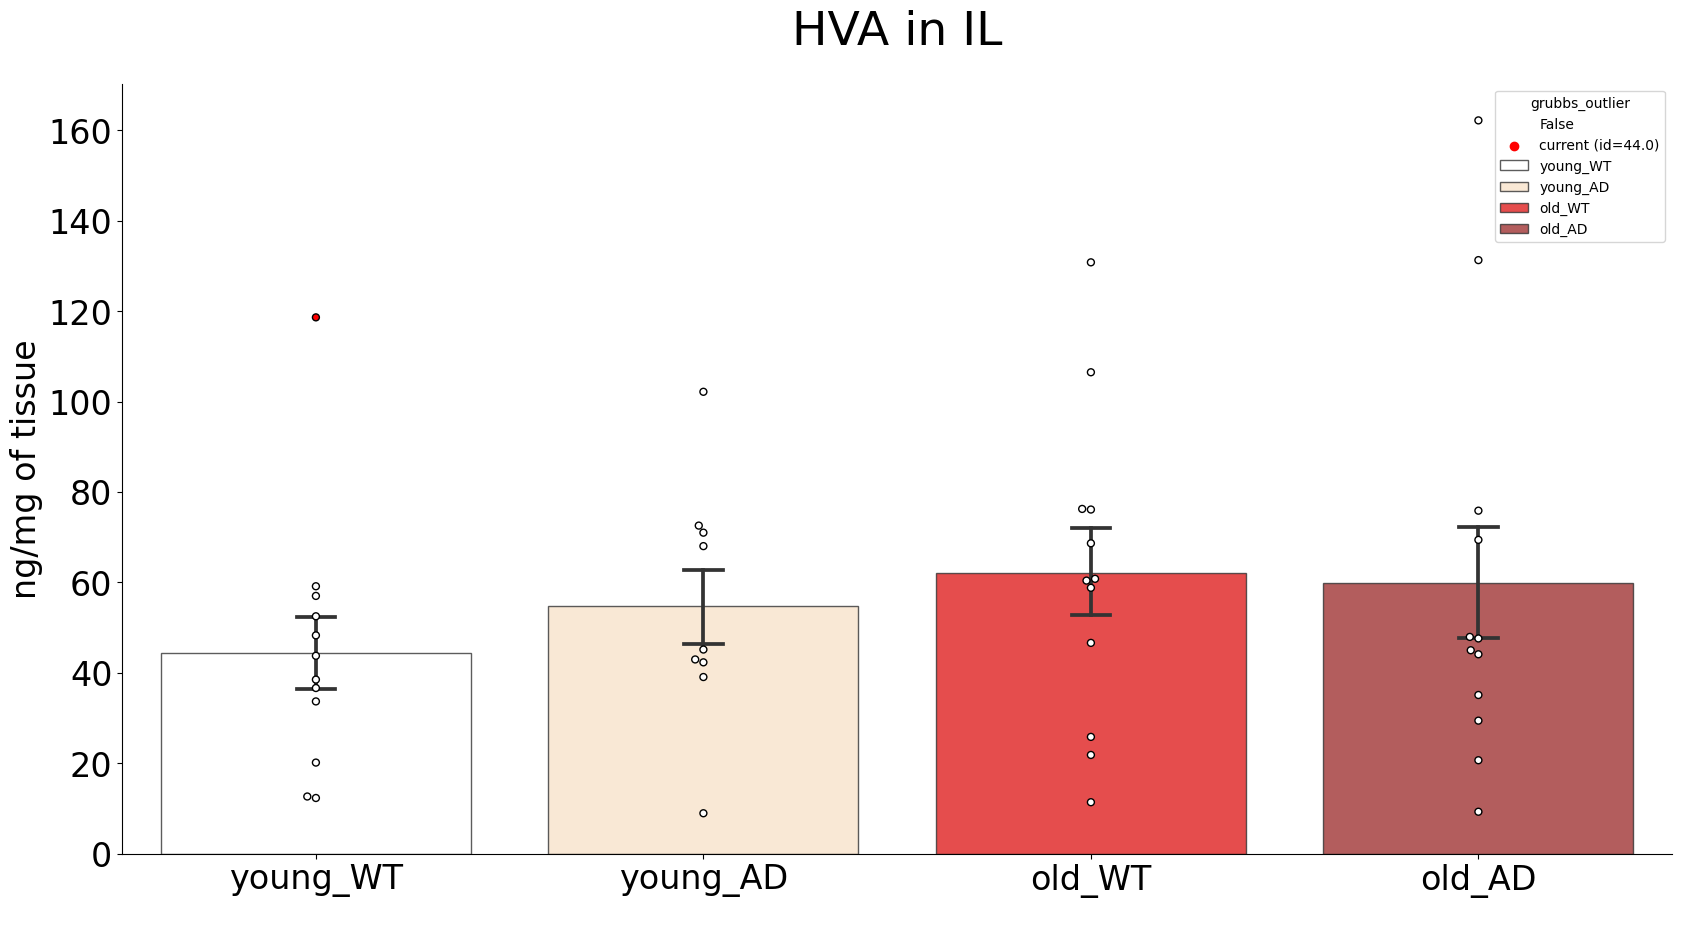

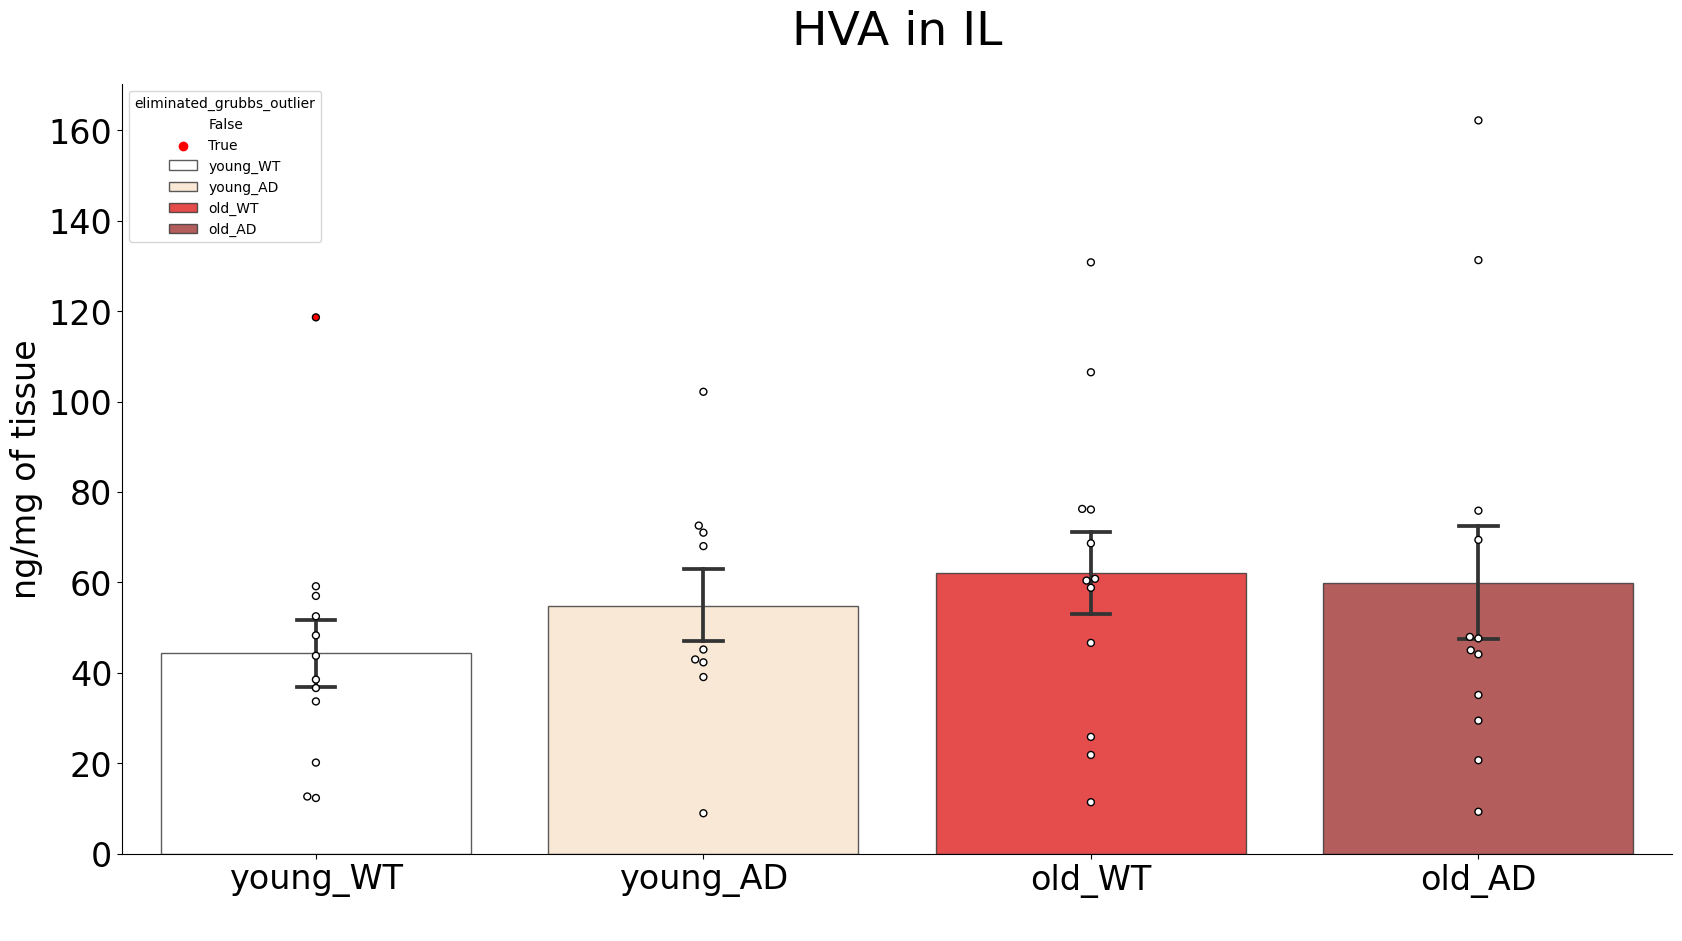

CACHED /Users/jasminebutler/Desktop/phd/input/cache/ALZHEIMERS_HPLC/compound_and_ratios_df.pkl
['grubbs_outlier', 'eliminated_grubbs_outlier'] UPDATED FOR HVA in IL of Alzheimers experiment

TWO_WAY_ANOVA NOT SIGNIFICANT
     Source         SS    DF        MS      F  p-unc    np2
0       old   2528.983   1.0  2528.983  2.312  0.136  0.055
1        AD    461.253   1.0   461.253  0.422  0.520  0.010
2  old * AD    996.927   1.0   996.927  0.911  0.345  0.022
3  Residual  43753.299  40.0  1093.832    NaN    NaN    NaN

ONE_WAY_ANOVA NOT SIGNIFICANT
          F   p_value
0  1.250206  0.304404

TUKEY NOT SIGNIFICANT
     group1    group2  meandiff   p-adj    lower    upper  reject
0    old_AD    old_WT    2.1764  0.9985 -34.0148  38.3676   False
1    old_AD  young_AD   -5.1336  0.9848 -44.2245  33.9573   False
2    old_AD  young_WT  -22.1289  0.3886 -59.1335  14.8756   False
3    old_WT  young_AD   -7.3100  0.9583 -46.4009  31.7809   False
4    old_WT  young_WT  -24.3053  0.3070 -61.3098  1

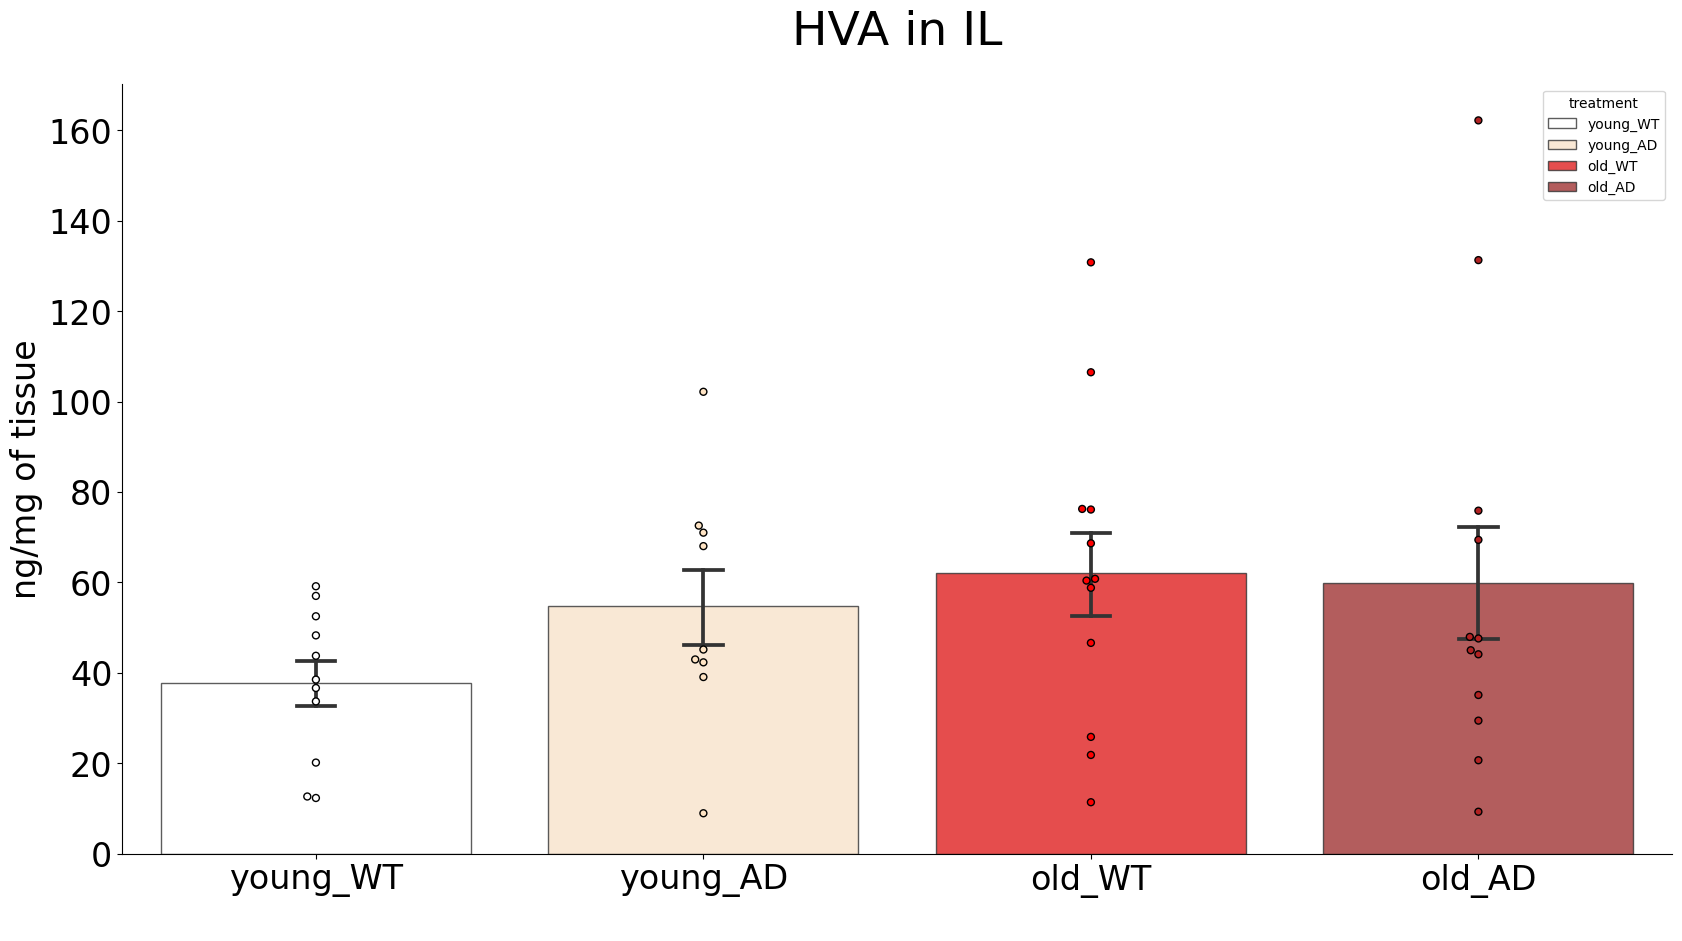

SAVED /Users/jasminebutler/Desktop/phd/output/Alzheimers_for_HVA_in_IL.svg
SAVED /Users/jasminebutler/Desktop/phd/output/Alzheimers_for_HVA_in_IL.png


In [14]:
#QUANTITATIVE HISTOGRAMS


# WITH PROMPTS - useful for looping over many
quantitativeHistogram(filename)

# MANUELY
quantitativeHistogram( 
    filename,
    p_value_threshold=0.05,
    compound='HVA',
    region='IL',
    experiment= 'Alzheimers', 
    do_outliers=False, 
    from_scratch=True
)


# subselectDf(getCompoundAndRatiosDf(filename), {'compound':'5HIAA/5HT', 'region':'OF', 'experiment':'agonist_antagonist'})


Invalid characters in identifier, replacing with '_' 
RETRIEVED "quantitative_stats" FROM "ALZHEIMERS_HPLC" CACHE
please make code for PLOTTING SIGNIFICANCE as in hist func


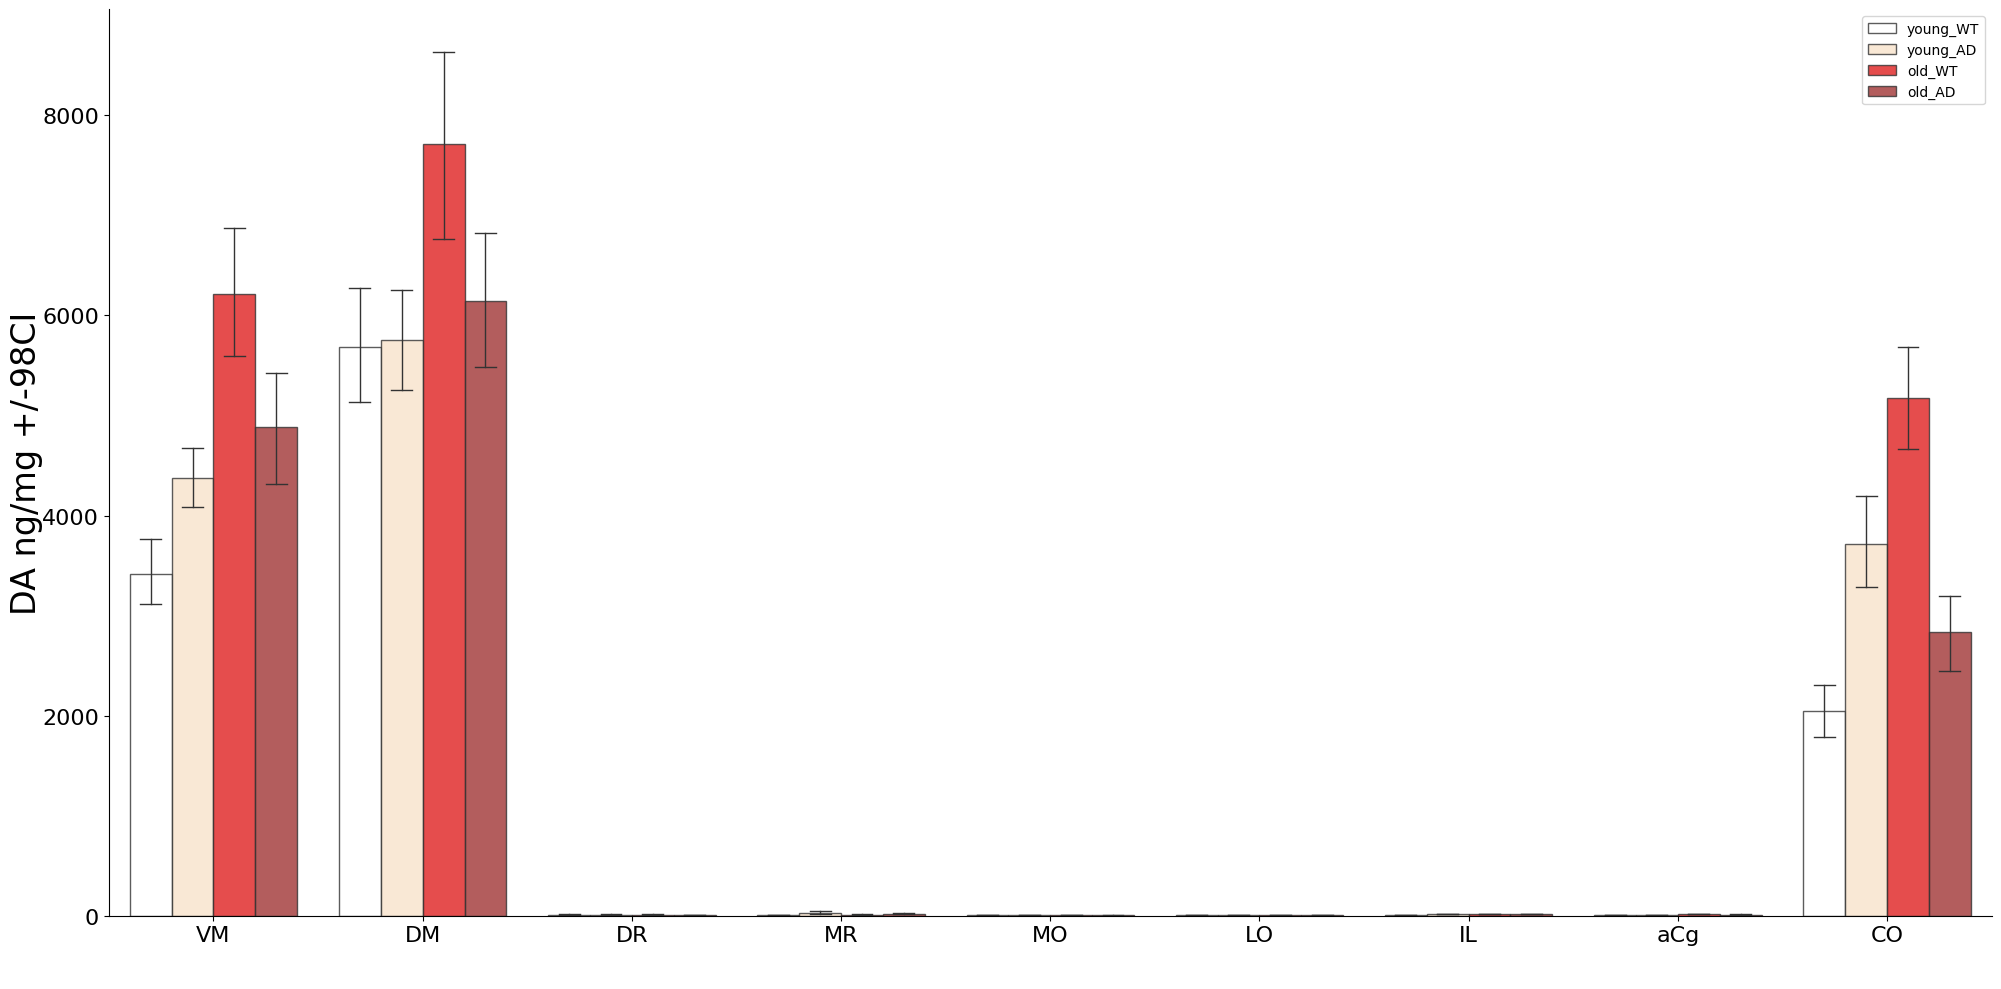

SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary_Alzheimers_for_DA_in_[_MO__ _LO__ _CO__ _MR__ _DR__ _VM__ _DM__ _IL__ _aCg_].svg
SAVED /Users/jasminebutler/Desktop/phd/output/quantitative_summary_Alzheimers_for_DA_in_[_MO__ _LO__ _CO__ _MR__ _DR__ _VM__ _DM__ _IL__ _aCg_].png


In [8]:
# QUANTITAIVE SUMMARY --  need to run juststats before

#ALZ REGIONS
# 'MO', 'LO', 'M2', 'PL', 'IL', 'aCg', 'pCg', 'S1', 'ENT', 'A', 'DH','VH', 'SH', 'CO', 'VM', 'DM', 'VL', 'DL', 'GP', 'vlT', 'MD', 'HYP', 'CB', 'SN', 'VTA', 'DR', 'MR'

# TCB REGIONS
# "OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V", "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"

quantitativeSummary(
    filename,
    experiment='Alzheimers',
    histogram_type='compound',  #  compound or region
    to_plot='DA',  # chosen compound or region 
    p_value_threshold=0.05,
    columns=["MO","LO","CO", "MR", "DR","VM",  "DM", "IL", "aCg"]  ,
                # "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                # "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], # x values to plot 
    from_scratch=True,
)


Invalid characters in identifier, replacing with '_' 
young_AD insuficient overlapp for [(('DA', 'MO'), ('DA', 'DH')), (('DA', 'M2'), ('DA', 'DH')), (('DA', 'A'), ('DA', 'DH')), (('DA', 'DH'), ('DA', 'MO')), (('DA', 'DH'), ('DA', 'M2')), (('DA', 'DH'), ('DA', 'A')), (('DA', 'DH'), ('DA', 'VH')), (('DA', 'DH'), ('DA', 'HYP')), (('DA', 'VH'), ('DA', 'DH')), (('DA', 'HYP'), ('DA', 'DH'))] pairs
Inspect with self.corr to adjust {columns} and redo analysis


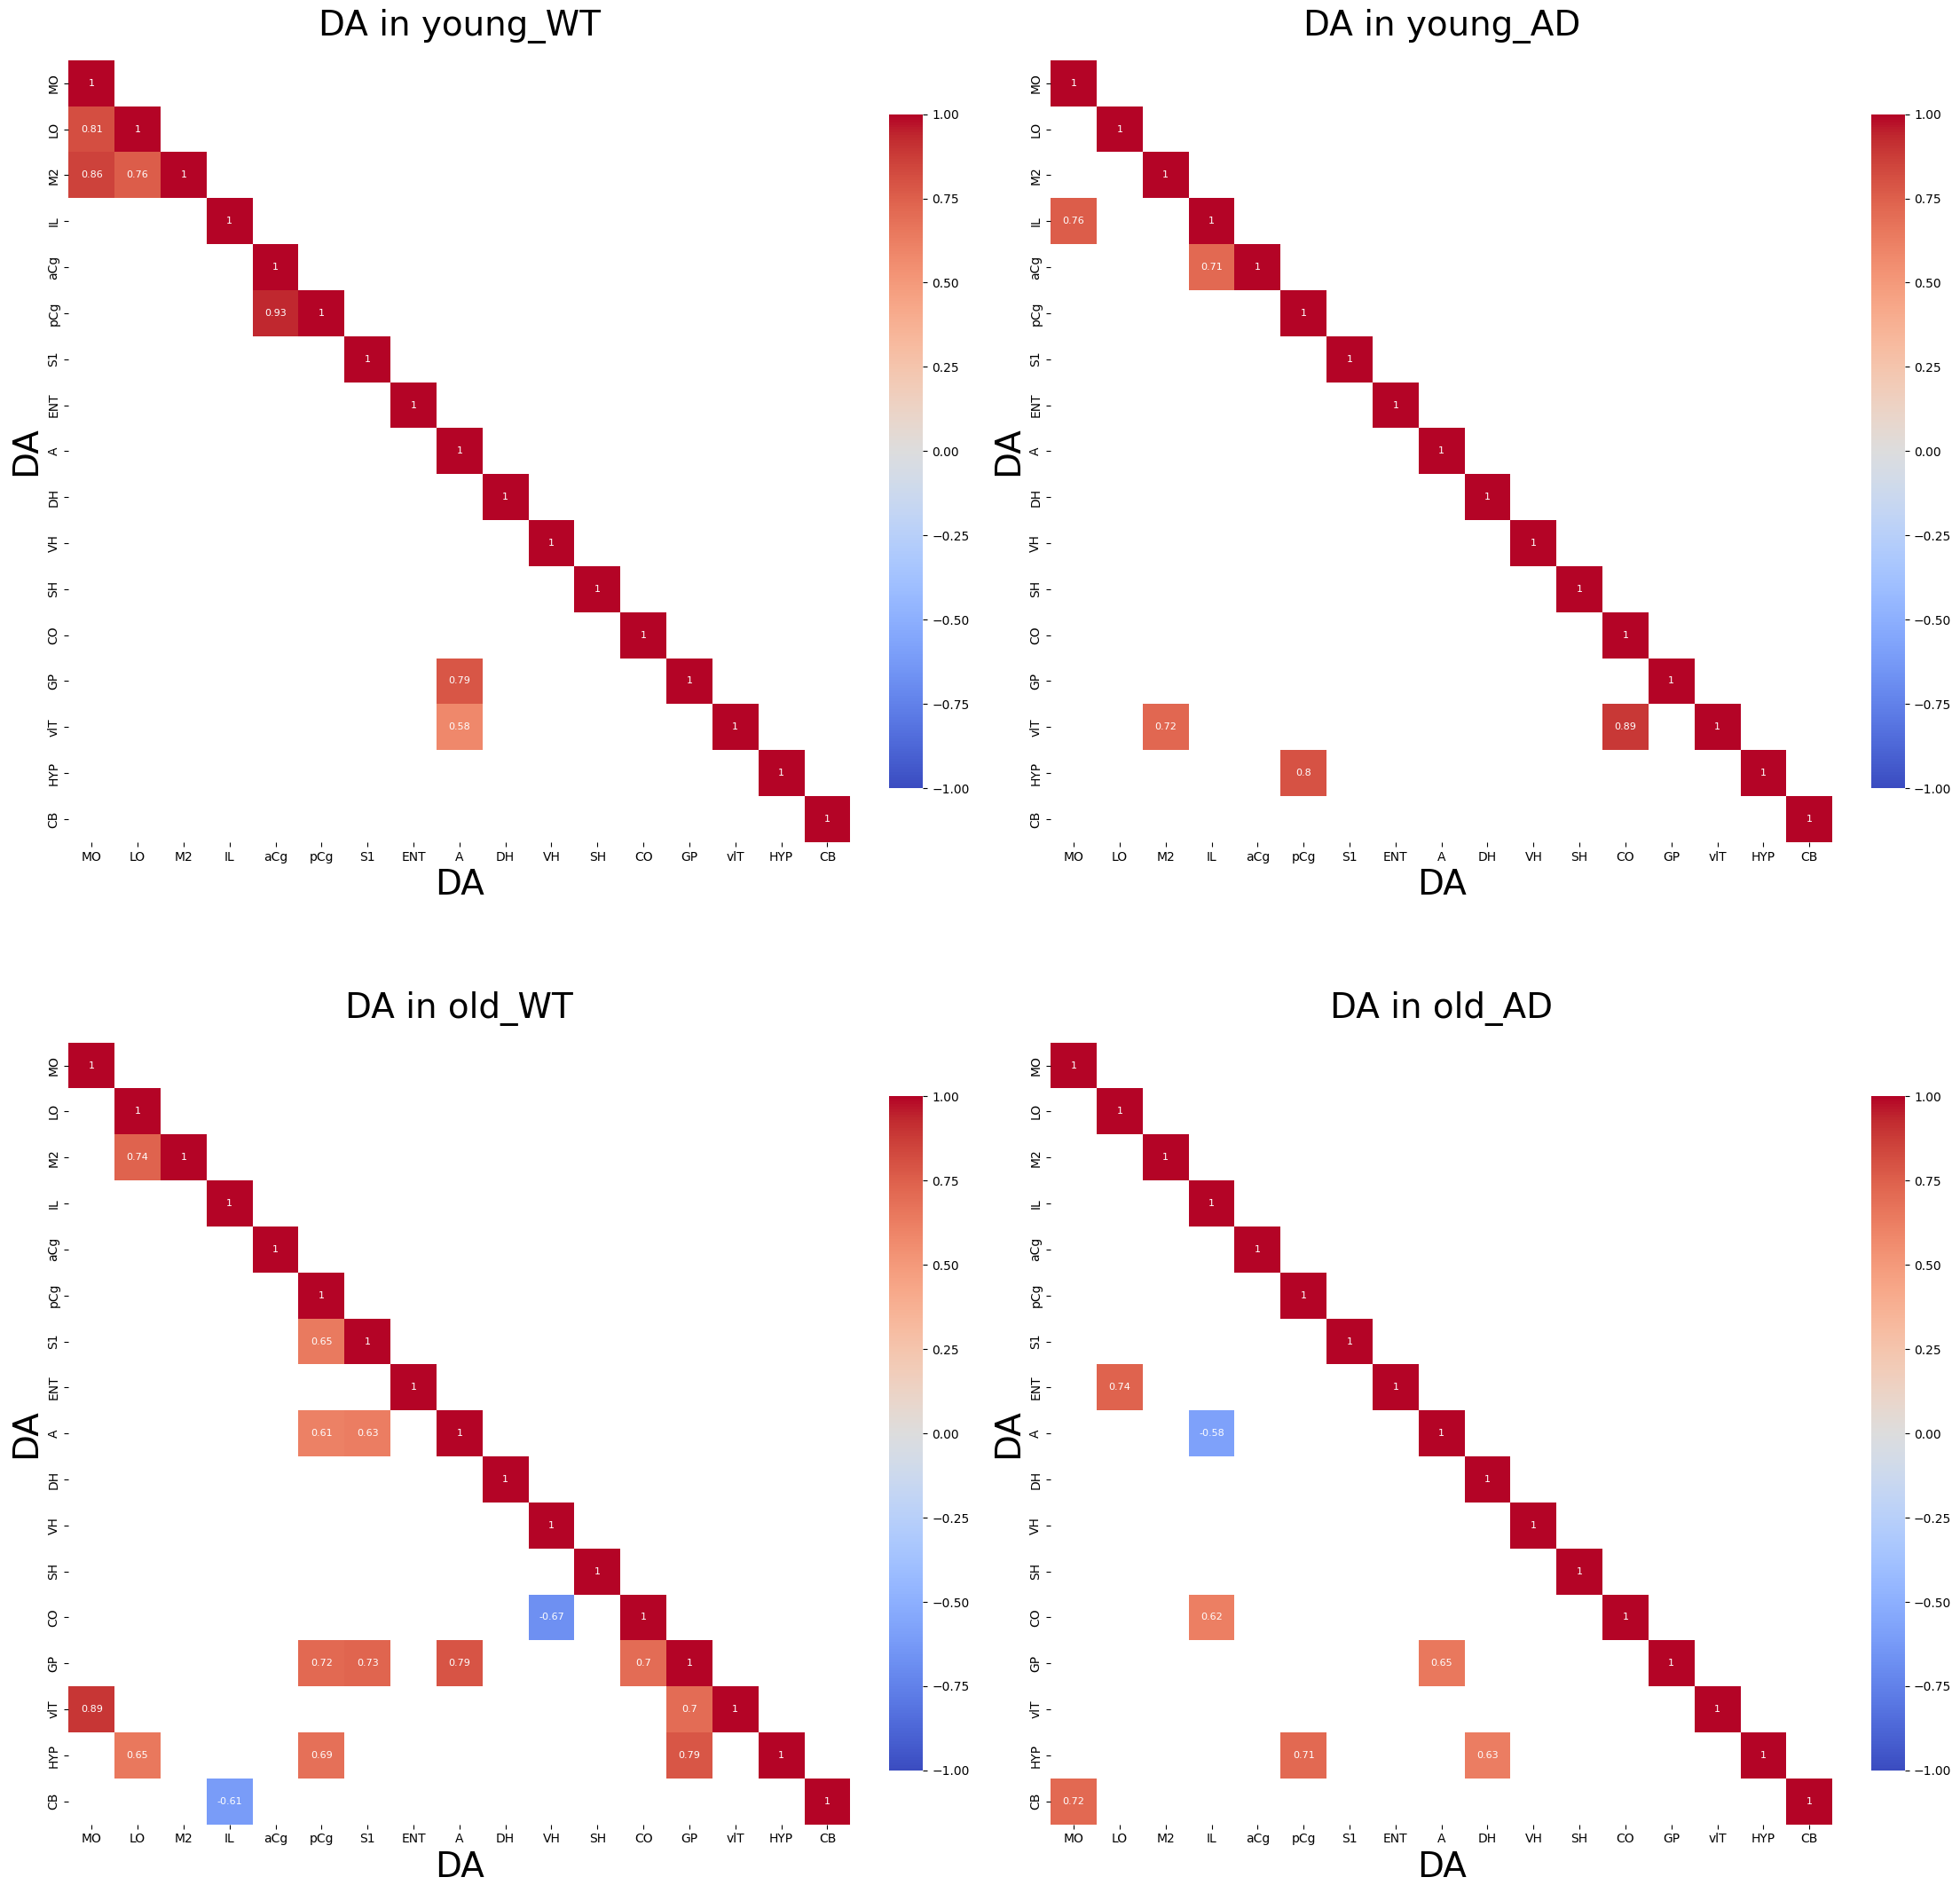

SAVED /Users/jasminebutler/Desktop/phd/output/Alzheimers_compound_DA_MO_LO_M2_IL_aCg_pCg_S1_ENT_A_DH_VH_SH_CO_GP_vlT_HYP_CB.svg
SAVED /Users/jasminebutler/Desktop/phd/output/Alzheimers_compound_DA_MO_LO_M2_IL_aCg_pCg_S1_ENT_A_DH_VH_SH_CO_GP_vlT_HYP_CB.png


In [22]:
#CORRELOGRAMS


#ALZ REGIONS
# 'MO', 'LO', 'M2', 'PL', 'IL', 'aCg', 'pCg', 'S1', 'ENT', 'A', 'DH','VH', 'SH', 'CO', 'VM', 'DM', 'VL', 'DL', 'GP', 'vlT', 'MD', 'HYP', 'CB', 'SN', 'VTA', 'DR', 'MR'

# TCB REGIONS
# "OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V", "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"


correlogram(filename, 
            experiment='Alzheimers', #  dose_response agonist_antagonist
            correlogram_type='compound',
            to_correlate='DA', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["MO","LO","M2","IL","aCg","pCg","S1","ENT","A","DH", "VH","SH", "CO", "GP","vlT","HYP","CB"],
            from_scratch=True,
            
            )



In [23]:
#GRAPH THEORY 

#TCB2 REGIONS
#coppy ['DA','NA','5HT','GLU','GABA','ASP','GLY']
#coppy ["OF","PL","CC", "M", "SJ","SL1", "SR1", "AC", "V",  
                        # "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
                        # "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"]

#ALZ REGIONS
# 'MO', 'LO', 'M2', 'PL', 'IL', 'aCg', 'pCg', 'S1', 'ENT', 'A', 'DH','VH', 'SH', 'CO', 'VM', 'DM', 'VL', 'DL', 'GP', 'vlT', 'MD', 'HYP', 'CB', 'SN', 'VTA', 'DR', 'MR'

network(filename, 
            experiment='Alzheimers', #  dose_response agonist_antagonist
            correlogram_type='compound',
            to_correlate='GLU', 
            p_value_threshold=0.05, 
            n_minimum=5, 
            columns=["MO","LO","M2","IL","aCg","pCg","S1","ENT","A","DH", "VH","SH", "CO", "GP","vlT","HYP","CB"],
            from_scratch=True,
            corr_method='pearson',
            )

# networkDegreeDistribution(filename,
#             experiment='agonist_antagonist', #  dose_response agonist_antagonist
#             correlogram_type='compound',
#             to_correlate= 'GLU',
#             p_value_threshold=0.05 ,
#             n_minimum=5,
#             columns=["OF","PL","CC", "M", "SJ","SL1", "SR1", "AC", "V",  
#                         "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
#                         "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"],
#             from_scratch=True,
#             corr_method='pearson',
# )

Invalid characters in identifier, replacing with '_' 


TypeError: unbound method set.intersection() needs an argument

In [ ]:
########### DEPRICATED ########FOLLOWING CELLS DONT RUN YET

# percentageVehiclesFig(
#         filename,
#         experiment='dose_response',
#         compound='DA',
#         regions=["OF","PL","CC", "IC","M", "SJ","SL1", "SL6", "SR6", "SR1", "AC", "V",  
#                 "Am", "dH", "vH", "NAc", "VM", "DM","VL", "DL", "MD",  "VPL",  "VPR", 
#                 "DG", "Y",  "SC","SN", "VTA", "DR","MR", "CE"], #REMI i would ike this to work the same way it does for correlograms i.e. also specifying the order 
#         from_scratch=True )

#plots but : UserWarning: FixedFormatter should only be used together with FixedLocator

RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE
RETRIEVED "headtwitch_df" FROM "TCB2_data_HT" CACHE

ONE_WAY_ANOVA SIGNIFICANT
           F       p_value
0  44.361039  2.500850e-11

TUKEY SIGNIFICANT
        group1      group2  meandiff   p-adj   lower   upper  reject
0  0.3mg/kgTCB  10mg/kgTCB    2.4500  0.0002  1.0825  3.8175    True
1  0.3mg/kgTCB   3mg/kgTCB    4.5636  0.0000  3.3040  5.8233    True
2  0.3mg/kgTCB    vehicles   -0.4667  0.8298 -1.9554  1.0221   False
3   10mg/kgTCB   3mg/kgTCB    2.1136  0.0009  0.7740  3.4532    True
4   10mg/kgTCB    vehicles   -2.9167  0.0001 -4.4737 -1.3597    True
5    3mg/kgTCB    vehicles   -5.0303  0.0000 -6.4935 -3.5671    True
RETRIEVED "quantitative_stats" FROM "TCB2_data_HT" CACHE
CACHED /Users/jasminebutler/Desktop/phd/input/cache/TCB2_data_HT/quantitative_stats.pkl
QUANTITATIVE STATS UPDATED
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***:

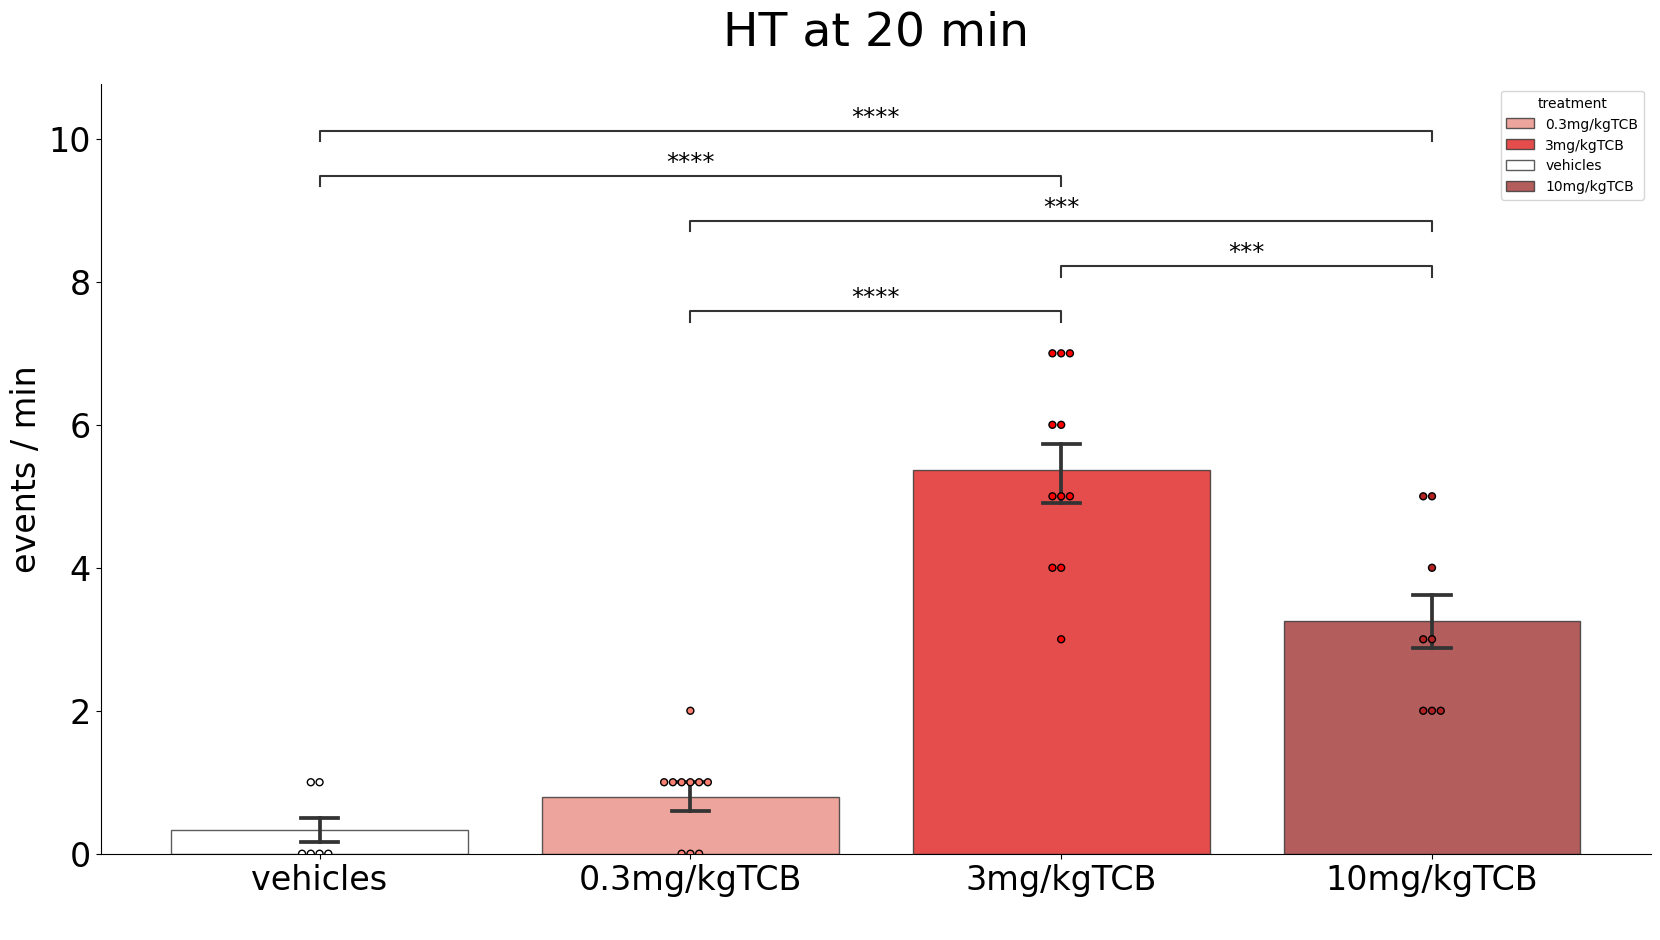

SAVED /Users/jasminebutler/Desktop/phd/output/head_twitch_histogram_dose_response_for_HT_20.svg
SAVED /Users/jasminebutler/Desktop/phd/output/head_twitch_histogram_dose_response_for_HT_20.png


In [7]:
#BEHQVIOR (HT / ES) #REMI need to intergrate stats logic, outliers, prompts and building multiple at once
# headTwitchHistogram(
#     HT_filename,
#     experiment='dose_response',
#     vairable='HT_20',
#     outlier_test=None,
#     p_value_threshold=0.05,
#     from_scratch=True,
# )

# subselectDf(getHeadTwitchDf(HT_filename), {"treatment": "0.2mg/kgMDL", "experiment": "agonist_antagonist"})


RETRIEVED "compound_and_ratios_df_aggregate_stats" FROM "TCB2_data_HPLC" CACHE


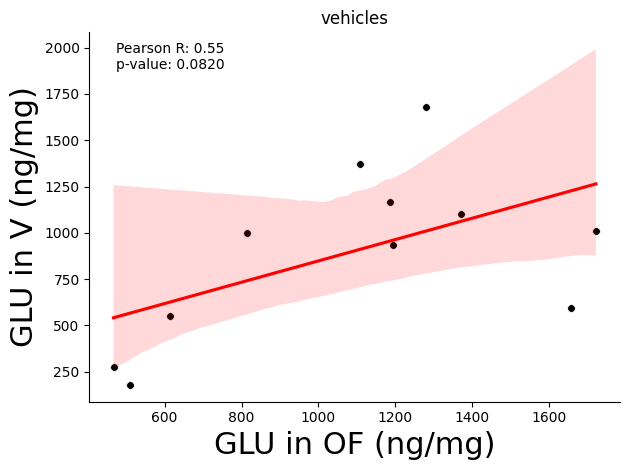

In [5]:
#show a single correlation #REMI/JJB make a funciton pls babe
#CONSTRUCTION
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#REMI / JAS w coffee this needs to be adjusted so its flexible between compounds between regions ect.... I was thinking a dict entry?
# line plot to show what a correlation is 
compound= 'GLU'
regions=['V', 'OF'] # y , x
treatment='vehicles'

df = subselectDf(getAggregateStatsDf(filename), {"treatment": treatment, "experiment": "dose_response", "region":regions, "compound":compound})

x_data = df[df['region'] == regions[1]]['values'].values[0]
y_data = df[df['region'] == regions[0]]['values'].values[0]

x_label=f"{compound} in {regions[1]} (ng/mg)"
y_label=f"{compound} in {regions[0]} (ng/mg)"

pearson_r, p_value = stats.pearsonr(x_data, y_data)
color = 'red' if pearson_r > 0 else 'blue'

fig, ax  = plt.subplots()
sns.scatterplot(x=x_data, y=y_data, ax=ax, marker='o',  s=30, color='black') #edgecolor='black', facecolor='salmon', linewidth=1.3,
sns.regplot(x=x_data, y=y_data, ci=95, ax=ax, scatter=False, line_kws={"color": color}) #scatter_kws={"color": "black"}

ax.set_xlabel(x_label, fontsize=22)
ax.set_ylabel(y_label, fontsize=22)
ax.spines[['right', 'top']].set_visible(False)
ax.set_title(treatment)
#add corr values
labels = f'Pearson R: {pearson_r:.2f}\np-value: {p_value:.4f}'
ax.text(0.05, 0.9, labels, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))

plt.tight_layout()

Invalid characters in identifier, replacing with '_' 
Mouse id 28 has NaN values in columns: 5HIAA/5HT_M
... removed mouse 28


/Users/jasminebutler/Desktop/phd/module/pca.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound_region'] = df['compound'] + '_' + df['region']


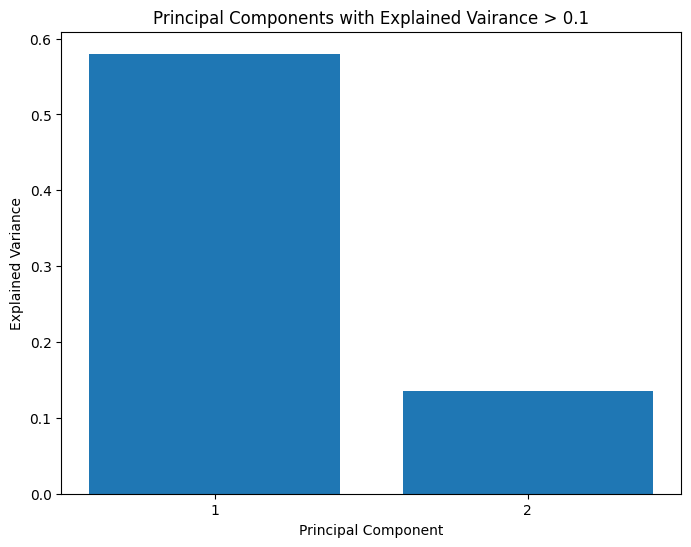

Loadings (Factors) for PC1 (Ordered by Absolute Magnitude):
          Factor   Loading
4   5HIAA/5HT_PL  0.418271
0   5HIAA/5HT_CC  0.408077
1   5HIAA/5HT_IC  0.366795
2    5HIAA/5HT_M  0.362500
7  5HIAA/5HT_SR1  0.357442
6  5HIAA/5HT_SL1  0.351254
5   5HIAA/5HT_SJ  0.271796
3   5HIAA/5HT_OF  0.259924
Loadings (Factors) for PC2 (Ordered by Absolute Magnitude):
          Factor   Loading
5   5HIAA/5HT_SJ -0.653723
3   5HIAA/5HT_OF  0.562416
6  5HIAA/5HT_SL1  0.354605
7  5HIAA/5HT_SR1 -0.222423
2    5HIAA/5HT_M  0.198315
4   5HIAA/5HT_PL -0.146801
0   5HIAA/5HT_CC -0.123066
1   5HIAA/5HT_IC  0.071362


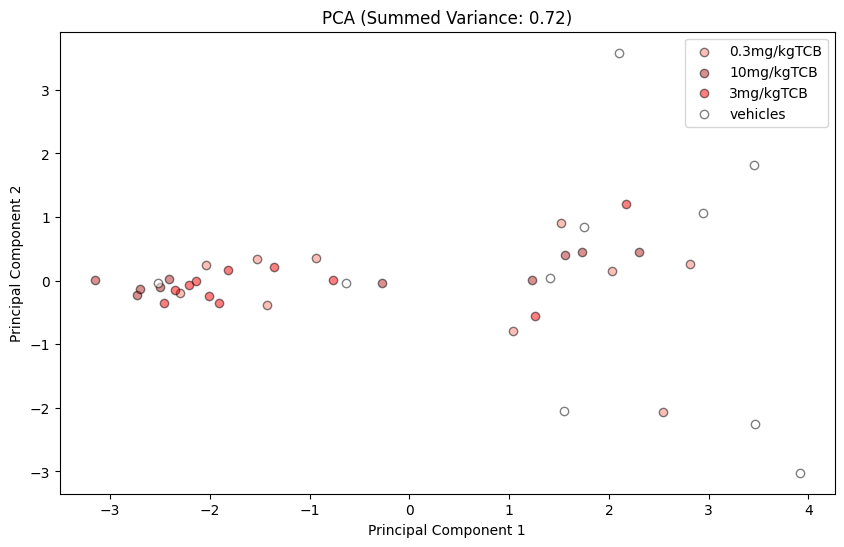

SAVED /Users/jasminebutler/Desktop/phd/output/pca_dose_response_for_[_5HIAA_5HT_]_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SR1_].svg
SAVED /Users/jasminebutler/Desktop/phd/output/pca_dose_response_for_[_5HIAA_5HT_]_in_[_OF__ _PL__ _CC__ _IC__ _M__ _SJ__ _SL1__ _SR1_].png


In [6]:
#PCA

# pca(filename)

pca(filename, 
    experiment='dose_response',
    compounds=['5HIAA/5HT'], 
    regions=["OF","PL","CC","IC","M", "SJ","SL1","SR1"], 
    from_scratch=True,
    threshold_vairance = 0.1)


In [ ]:

##### MAKE DOCS LAZY GIRL #####

# outlier tests  = ['grubbs', 'ROUT']  #todo add code for ROUT
# post hoc tests = [ 'pLSD' , 'tukey' ] #todo add code for
# quantitative stats = ['two_way_anova', 'one_way_anova', 'tukey'] #TODO this should not be here but with post hoc not written yet
# correlative stats = ['pearson', 'spearmam', 'kendall']

#DFs floating around
# aggergate_stats, quantative_stats, compound_and_ratio_df ++graph_stats
